# Setup

In [60]:
import json
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

CUTOFF_FREQ = 600

In [61]:
def load_chars() -> dict:
    with open('characters-conf.js') as f:
        while True:
            if f.read(1) == '\n':
                break
        d = json.load(f)
    for name, obj in d.items():
        d[name]['color'] = np.array(d[name]['color'])/255
    return d

CHARS = load_chars()

In [62]:
data_path = Path('data')
data = {}

for path in data_path.glob('*.npz'):
    name = path.name.removesuffix('.npz')
    npz = np.load(path)
    scale, level = npz['scale'], npz['level']
    cutoff_idx = np.searchsorted(scale, CUTOFF_FREQ, side='right')
    scale, level = scale[:cutoff_idx], level[:cutoff_idx]
    level /= np.max(level)
    data[name] = {
        'scale': scale,
        'level': level,
    }

# Summary

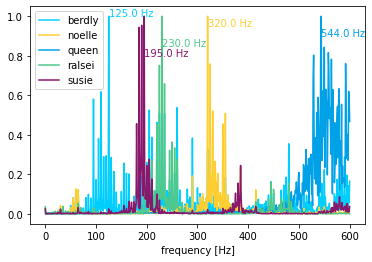

In [63]:
for i, (name, wave) in enumerate(data.items()):
    peak_idx = np.argmax(wave['level'])
    peak_freq = wave['scale'][peak_idx]
    plt.plot(wave['scale'], wave['level'], label=name, color=CHARS[name]['color'])
    plt.annotate(f'{peak_freq} Hz', xy=(peak_freq, 1 - i*0.05), color=CHARS[name]['color'])

plt.xlabel('frequency [Hz]')
plt.legend(loc='upper left')
plt.show()

# Results for each character

In [64]:
def plot_one_character(name: str, low: int, high: int):
    low_idx = np.searchsorted(data[name]['scale'], low, side='left')
    high_idx = np.searchsorted(data[name]['scale'], high, side='right')
    plt.xlabel('frequency [Hz]')
    plt.plot(data[name]['scale'][low_idx:high_idx], data[name]['level'][low_idx:high_idx], color=CHARS[name]['color'])
    freq = CHARS[name]['freq_range'][0]
    idx = np.searchsorted(data[name]['scale'], freq, side='left')
    plt.annotate(f"{freq} Hz", xy=(freq, data[name]['level'][idx]), color=CHARS[name]['color'])
    freq = CHARS[name]['freq_range'][1]
    idx = np.searchsorted(data[name]['scale'], freq, side='left')
    plt.annotate(f"{freq} Hz", xy=(freq, data[name]['level'][idx]), color=CHARS[name]['color'])
    plt.show()


## Susie

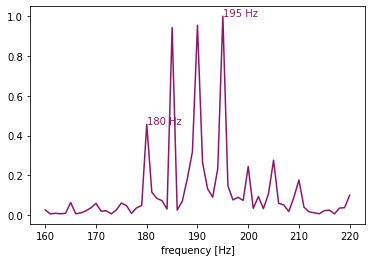

In [65]:
plot_one_character('susie', 160, 220)

## Ralsei

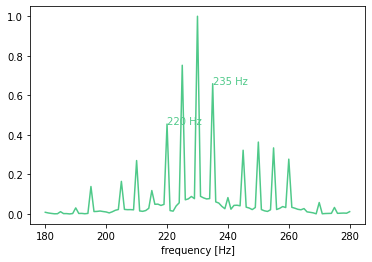

In [66]:
plot_one_character('ralsei', 180, 280)

## Noelle

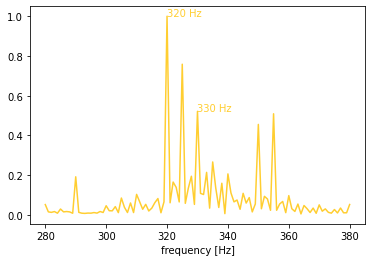

In [67]:
plot_one_character('noelle', 280, 380)

## Berdly

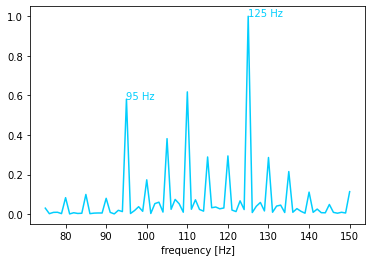

In [68]:
plot_one_character('berdly', 75, 150)